In [4]:
File_path = "/home/jovyan/steelelab/measurement_data/Triton/Jasper/HBAR_transmon_flipchip/"

### IMPORTS ###
import glob, os, xarray, bokeh, time, math, scipy
import stlabutils;   # import stlab repository: https://github.com/steelelab-delft/stlab
import numpy as np

import matplotlib.pyplot  as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.pyplot import cm
import matplotlib.colors as mplcolors
import matplotlib.gridspec as gridspec

### RC params ####
plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', labelsize=10)    # axis labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize

# rc params linecuts
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.linestyle'] = ':'

# rc params general plotting:
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.format'] = 'pdf'#'png'#'jpg'

['Frequency (Hz)', ' CH2_S21_S1re ()', ' CH2_S21_S1im ()', ' CH2_S21_S1dB (dB)', ' CH2_S21_S1Ph (rad)', ' Probe Power (dBm)', ' Drive Power (dBm)', ' VNA Port 1 RT Attn (dB)', ' VNA Port 2 RT Attn (dB)', ' Line inside fridge Attn (dB)', ' Number Miteqs', ' Stark freq [Hz]', ' Stark power [dBm]']


(2.45, 3.2)

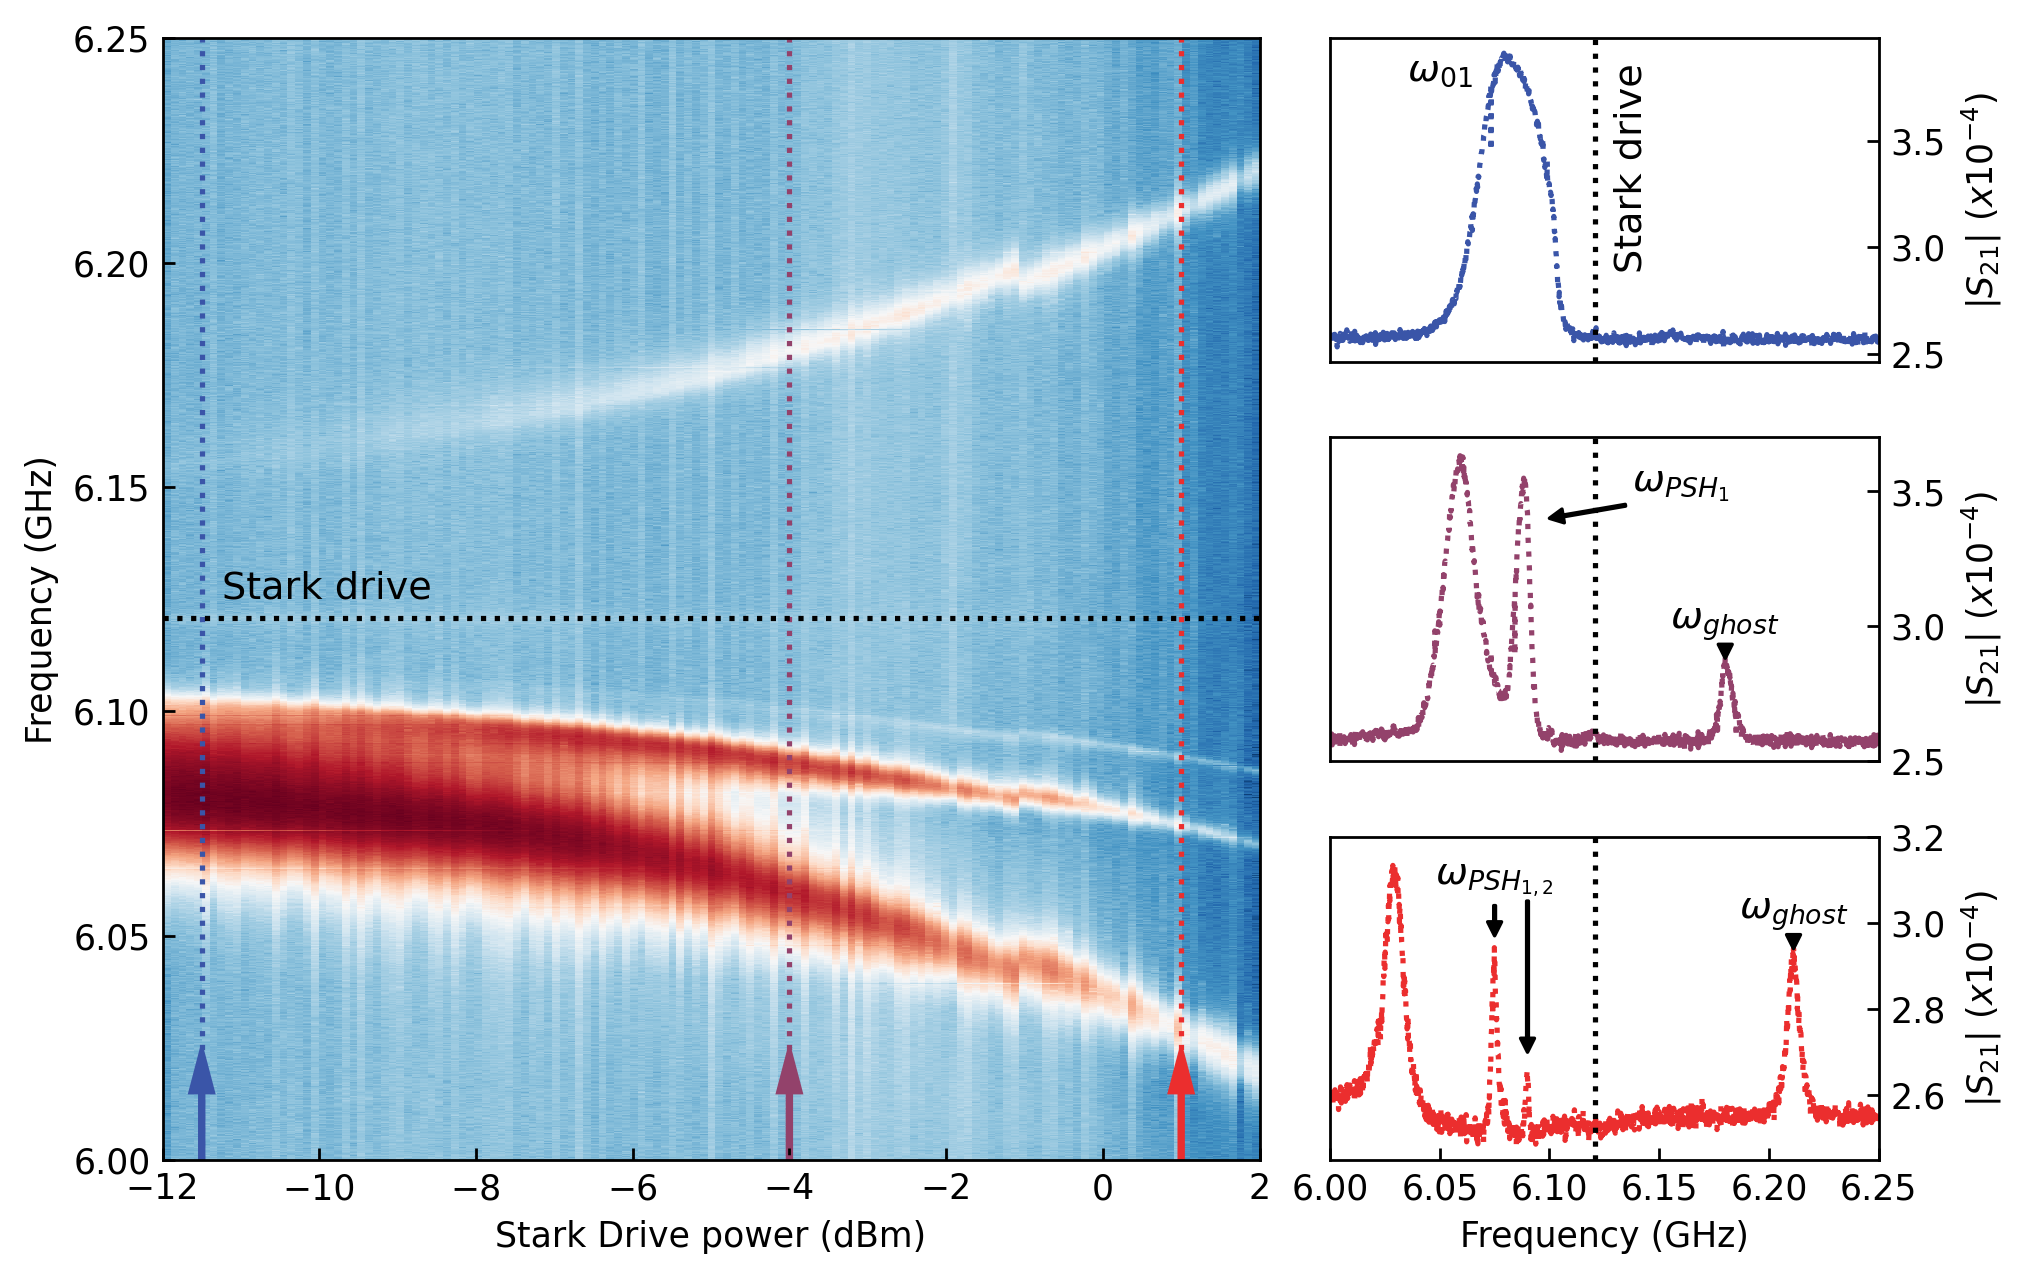

In [2]:
## SET PARAMETERS
### frequencies, powers
Stark_blue = 6.12072;         Stark_red = 6.06072;  qubit_freq = 6.09072
freq1 = 6.00;  freq2 = 6.25   #frequency limits
Stark_pow = [-11.5,-4,1]      #powers for linecuts

###colors
## lincut colors
St_tone_color = 'k'
# colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']
# colors = cm.copper(np.linspace(0.1, 0.8, 3))
colors = ['#3a55a8','#93426b','#eb2e2e']

## colormaps
col_maps = 'PuBu'  #'PuBuGn_r'  #'turbo'  #'ocean' #'PuBu' #'RdBu'

## LOAD FILES:
file_name = "Zoom_STARK_1_2023_02_10_11.53.42_Fix3_spec"; file_pre = File_path+file_name+'/'+file_name+'.dat';    
file = stlabutils.readdata.readdat(file_pre,delim=',');
S21dB = []; Drive_powers = []

for i in np.arange(len(file)):
    ##load DATA
    Freq = file[i]['Frequency (Hz)'].values;      S21Real = file[i][' CH2_S21_S1re ()'].values
    S21Imag = file[i][' CH2_S21_S1im ()'].values; S21dB_pre = np.abs(S21Real + 1j*S21Imag)
    Drive_powers.append(file[i][' Stark power [dBm]'].values[0])    
    S21dB.append(S21dB_pre)

Stark_freq = file[0][' Stark freq [Hz]'].values[0]
#####################################################################################################################
### FIND RIGHT INDEX STARK POWER:
idx=[]
for i in np.arange(len(Stark_pow)):
    idx.append(int(np.argmin(np.abs(np.array(Drive_powers)-Stark_pow[i]))))
#####################################################################################################################
#Making the plots:
fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'MiddleRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})

#Left color plot:
#create x,y,z for imshow colorplot    
x = Drive_powers;           y = Freq/1e9;         data = np.array(np.transpose(S21dB)).reshape((len(y), len(x)))

#setting for scaling
scale_fact_Z = 1e4

### color plot:
c = axs['Left'].imshow(data*scale_fact_Z, cmap = "RdBu_r", 
#                vmin = np.min(data)*scale_fact_Z, vmax = np.max(data)*scale_fact_Z*1.1, 
               aspect='auto', interpolation ='none',
               extent = [x[0], x[-1], y[0], y[-1]], alpha = 1,origin ='lower',
                       norm=mplcolors.PowerNorm(gamma=0.6))
axs['Left'].set_ylabel('Frequency (GHz)');   
axs['Left'].set_xlabel('Stark Drive power (dBm)'); 
axs['Left'].tick_params(axis='both', which='major')
# axs['Left'].set_title('Plot on Left')
for ii in np.arange(len(Stark_pow)):
    axs['Left'].axvline(x = Stark_pow[ii], color=colors[ii])
    axs['Left'].arrow(Stark_pow[ii], np.min(Freq)/1e9, 0, 0.015, width=0.05,head_length=0.01,head_width=0.3,color=colors[ii])
axs['Left'].set_ylim([freq1,freq2])

# #colorbar:   
# divider = make_axes_locatable(axs['Left'])
# cax = divider.append_axes("right", size="5%", pad=0.075)
# clb = plt.colorbar(c, cax=cax, pad=0.05)
# clb.ax.set_title(r'|$S_{21}$|',fontsize=7)

## TOP RIGHT LINE CUT:
axs['TopRight'].plot(Freq/1e9,S21dB[idx[0]]*1e4,color=colors[0])
axs['TopRight'].set_ylabel(r'$|S_{21}|~ (x10^{-4})$'); 
axs['TopRight'].tick_params(axis='both', which='major')
# axs['TopRight'].set_yticks([]); 
axs['TopRight'].yaxis.tick_right(); 
axs['TopRight'].yaxis.set_label_position("right"); axs['TopRight'].set_xticks([])
axs['TopRight'].set_xlim([freq1,freq2])

## TOP RIGHT LINE CUT:
axs['MiddleRight'].plot(Freq/1e9,S21dB[idx[1]]*1e4,color=colors[1])
axs['MiddleRight'].set_ylabel(r'$|S_{21}|~ (x10^{-4})$'); 
axs['MiddleRight'].tick_params(axis='both', which='major')
# axs['MiddleRight'].set_yticks([]); 
axs['MiddleRight'].yaxis.tick_right(); 
axs['MiddleRight'].yaxis.set_label_position("right"); axs['MiddleRight'].set_xticks([])
axs['MiddleRight'].set_xlim([freq1,freq2])

## Bottom RIGHT LINE CUT:
axs['BottomRight'].plot(Freq/1e9,S21dB[idx[2]]*1e4,color=colors[2])
axs['BottomRight'].set_xlabel('Frequency (GHz)'); 
axs['BottomRight'].set_ylabel(r'$|S_{21}|~ (x10^{-4})$'); 
axs['BottomRight'].tick_params(axis='both', which='major')
# axs['BottomRight'].set_yticks([]); 
axs['BottomRight'].yaxis.tick_right(); 
axs['BottomRight'].yaxis.set_label_position("right"); #axs['BottomRight'].set_xticks([])
axs['BottomRight'].set_xlim([freq1,freq2])

##lines for Stark:
for i in ['TopRight','MiddleRight','BottomRight']:
    axs[i].axvline(x = Stark_freq/1e9, color=St_tone_color)

axs['Left'].axhline(y = Stark_freq/1e9, color=St_tone_color)

##TEXT:
# axs['Left'].text(0.3, 0.97, 'Qubit Drive power: '+str(file[0][' Drive Power (dBm)'].values[0])+' dBm', 
#                  horizontalalignment='center', verticalalignment='center', 
#                  transform=axs['Left'].transAxes,color=St_tone_color, rotation = 0)

axs['Left'].text(0.15, 0.51, r'Stark drive', horizontalalignment='center', verticalalignment='center', 
         transform=axs['Left'].transAxes,color=St_tone_color, rotation = 0)

axs['TopRight'].text(0.2, 0.90, r'$\omega_{01}$', horizontalalignment='center', verticalalignment='center', 
         transform=axs['TopRight'].transAxes,color='k', rotation = 0)

axs['TopRight'].text(0.55, 0.6, r'Stark drive', horizontalalignment='center', verticalalignment='center', 
         transform=axs['TopRight'].transAxes,color=St_tone_color, rotation = 90)

######### ANNOTATE PEAKS
f1 = Stark_blue*1e9;  f2 = Freq[-1]

### MIDDLE RIGHT ###
max_ghost = np.max(S21dB[idx[1]][int(np.argmin(np.abs(np.array(Freq)-f1))):int(np.argmin(np.abs(np.array(Freq)-f2)))])  
ghost_freq = Freq[int(np.argmin(np.abs(np.array(S21dB[idx[1]])-max_ghost)))]

axs['MiddleRight'].annotate(r'$\omega_{ghost}$',
             xy = (ghost_freq/1e9, max_ghost*1e4),
             xytext = (ghost_freq/1e9, max_ghost*1e4 + 0.11),
             arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 4,headlength=4),
             horizontalalignment = 'center')

axs['MiddleRight'].annotate(r'$\omega_{PSH_1}$',
             xy = (6.10, 3.4),
             xytext = (6.16, 3.5),
             arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 4,headlength=4),
             horizontalalignment = 'center')

### BOTTOM RIGHT ###
max_ghost = np.max(S21dB[idx[2]][int(np.argmin(np.abs(np.array(Freq)-f1))):int(np.argmin(np.abs(np.array(Freq)-f2)))])  
ghost_freq = Freq[int(np.argmin(np.abs(np.array(S21dB[idx[2]])-max_ghost)))]

axs['BottomRight'].annotate(r'$\omega_{ghost}$',
             xy = (ghost_freq/1e9, max_ghost*1e4),
             xytext = (ghost_freq/1e9, max_ghost*1e4 + 0.07),
             arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 4,headlength=4),
             horizontalalignment = 'center')

axs['BottomRight'].annotate(r'$\omega_{PSH_{1,2}}$',
             xy = (6.075, 2.97),
             xytext = (6.075, 3.09),
             arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 4,headlength=4),
             horizontalalignment = 'center')

axs['BottomRight'].annotate(r'$~~~~~~$',
             xy = (6.09, 2.7),
             xytext = (6.09, 3.085),
             arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 4,headlength=4),
             horizontalalignment = 'center')

#SET limits:
axs['MiddleRight'].set_ylim([2.50,3.70])
axs['BottomRight'].set_ylim([2.45,3.20])

## Save data:
#plt.savefig('Figure3_ZoomIN_data_paramSubh_noColorbar',bbox_inches = 'tight')

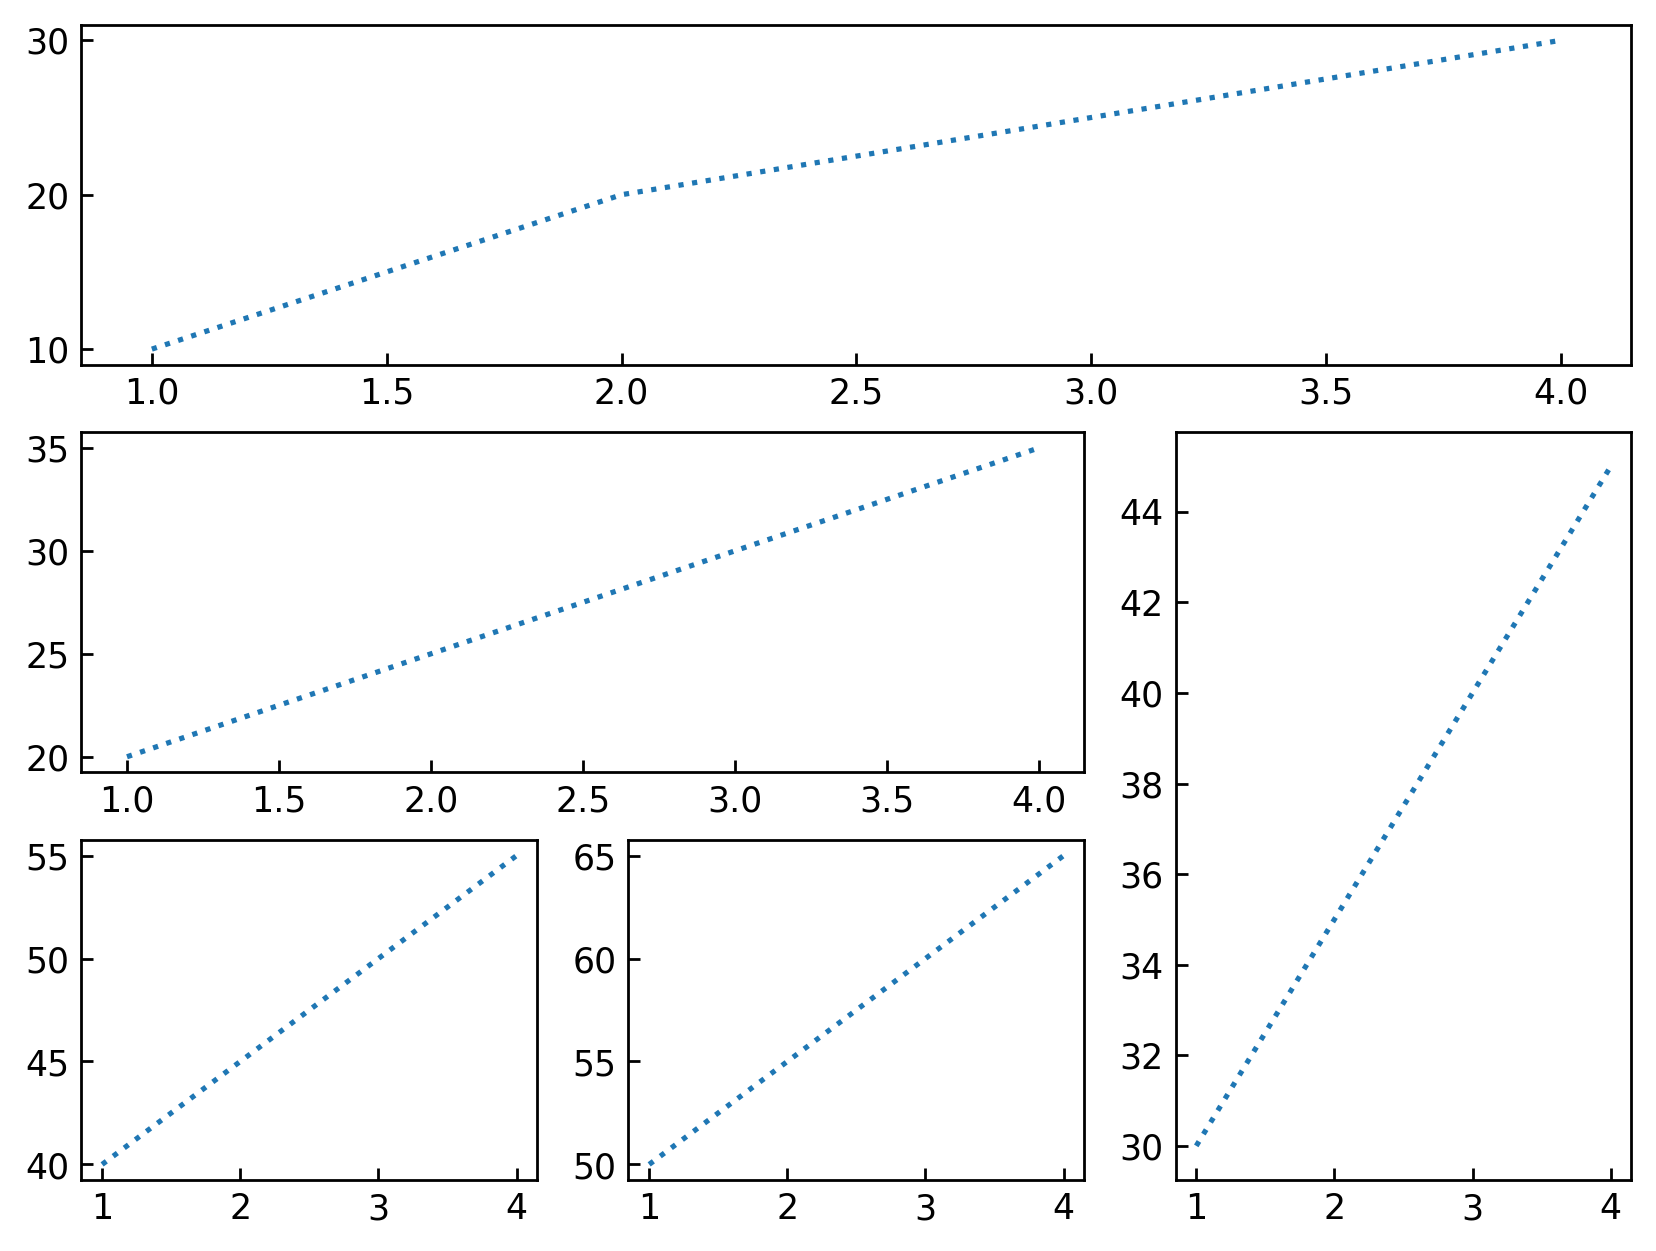

In [5]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

ax1.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax2.plot([1, 2, 3, 4], [20, 25, 30, 35])
ax3.plot([1, 2, 3, 4], [30, 35, 40, 45])
ax4.plot([1, 2, 3, 4], [40, 45, 50, 55])
ax5.plot([1, 2, 3, 4], [50, 55, 60, 65])

plt.show()